# Introduction to Python and Jupyter Notebooks 

In [1]:
print('Hello World! ')

Hello World! 


**Jupyter Notebooks**

This document is called a Jupyter Notebook. It's a convenient way to interact with data within a Python envirnonment. Here is a good [tutorial](https://realpython.com/jupyter-notebook-introduction/) all about notebooks.

Each "cell" can contain either text or code that we wish to execute. You can select the type of cell in the pull-down menu above.

To execute a code cell, hit "Shift+Enter".

To see a list of commands, click the Help pull-down menu above.


## Import required libraries

Python allows users to import libraries containing various functions. The syntax for this is:

```python
import library_name
from library_name import function
```

Python has a number of powerful libraries for handling data. The most commonly used modules are called `numpy`, `pandas`, and `matplotlib`.


**numpy**

[numpy](https://www.numpy.org) is a powerful library geared to numerical analysis of arrays of data. 

**pandas**

[Pandas](https://pandas.pydata.org) is a data-oriented library based around a set of core data structures. The main structure is called a `DataFrame`, which is a 2D tabular-like structure. 

There are very simple tools to read in common data formats into Pandas. In this lab we will use the `pd.read_csv` function to load data from a text file.

**matplotlib**

We will use [matplotlib](https://matplotlib.org) to plot and display the data and the fit results. We will load the `pyplot` submodule which provides key plotting tools for us. 


# Simulating electron - proton collisions 

## Day-1 : Introduction and first run
We will first initialize our simulation toolkit - PYTHIA (pythia.org) and run a few collisions of electrons and protons at varying energies and begin to study the output  

In [2]:
# Importing useful headers
import pythia8
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Initialize the pythia object and setup the type of collisions 

In [3]:
pythia = pythia8.Pythia()
#Set up incoming beams, for frame with unequal beam energies.
pythia.readString("Beams:frameType = 2")


 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.307      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change: 25 Feb 2022  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 12 Jun 2023 at 08:42:42    |  | 
 |  |                                                                              |  | 
 |  |   Program docu

True

mentation and an archive of historic versions is found on:     |  | 
 |  |                                                                              |  | 
 |  |                               https://pythia.org/                            |  | 
 |  |                                                                              |  | 
 |  |   PYTHIA is authored by a collaboration consisting of:                       |  | 
 |  |                                                                              |  | 
 |  |   Christian Bierlich, Nishita Desai, Leif Gellersen, Ilkka Helenius, Philip  |  | 
 |  |   Ilten, Leif Lönnblad, Stephen Mrenna, Stefan Prestel, Christian Preuss,    |  | 
 |  |   Torbjörn Sjöstrand, Peter Skands, Marius Utheim and Rob Verheyen.          |  | 
 |  |                                                                              |  | 
 |  |   The complete list of authors, including contact information and            |  | 
 |  |   affiliations, can be found on htt

In [4]:
# Set the proton energy - 
pEnergy = 920
#BeamA = proton.
pythia.readString("Beams:idA = 2212")
pythia.settings.parm("Beams:eA", pEnergy)

In [5]:
# Set the electron energy - 
eEnergy = 500
#BeamB = electron.
pythia.readString("Beams:idB = 11")
pythia.settings.parm("Beams:eB", eEnergy)

In [6]:
#Set up DIS process within some phase space.
#Neutral current (with gamma/Z interference).
pythia.readString("WeakBosonExchange:ff2ff(t:gmZ) = on")

#Phase-space cut: minimal Q2 of process.
pythia.settings.parm("PhaseSpace:Q2Min", 25)

#Set dipole recoil on. Necessary for DIS + shower.
pythia.readString("SpaceShower:dipoleRecoil = on")

#Allow emissions up to the kinematical limit,
#since rate known to match well to matrix elements everywhere.
pythia.readString("SpaceShower:pTmaxMatch = 2")

#QED radiation off lepton not handled yet by the new procedure.
pythia.readString("PDF:lepton = off")
pythia.readString("TimeShower:QEDshowerByL = off")

pythia.init()


 *-------  PYTHIA Process Initialization  --------------------------*
 |                                                                  |
 | We collide p+ with e- at a CM energy of 1.356e+03 GeV            |
 |                                                                  |
 |------------------------------------------------------------------|
 |                                                    |             |
 | Subprocess                                    Code |   Estimated |
 |                                                    |    max (mb) |
 |                                                    |             |
 |------------------------------------------------------------------|
 |                                                    |             |
 | f f' -> f f' (t-channel gamma*/Z0)             211 |   3.797e-04 |
 |                                                                  |
 *-------  End PYTHIA Process Initialization -----------------------*

 *-------  PYTHIA 

True

In [7]:
pythia.next()

part_pt = []
part_eta = []
part_theta = []
part_phi = []
part_E = []
part_p = []
part_m = []
part_id = []

for particle in pythia.event:
    if particle.isFinal():
        pT = float('%.3g' % particle.pT())
        part_pt.append(pT)
        eta = float('%.3g' % particle.eta())
        part_eta.append(eta)
        theta = float('%.3g' % particle.theta())
        part_theta.append(theta)
        phi = float('%.3g' % particle.phi())
        part_phi.append(phi)
        E = float('%.3g' % particle.e())
        part_E.append(E)
        p = float('%.3g' % particle.pAbs())
        part_p.append(p)
        mass = float('%.3g' % particle.m())
        part_m.append(mass)
        part_id.append(particle.id())
        print(particle.id(), pT, eta, theta, phi, E, p, mass)

part_pt = np.array(part_pt)
part_phi = np.array(part_phi)
part_eta = np.array(part_eta)
part_theta = np.array(part_theta)
part_E = np.array(part_E)
part_p = np.array(part_p)
part_m = np.array(part_m)
part_id = np.array(part_id)
particles = np.vstack((part_id, part_pt, part_phi, part_eta, part_theta, part_E, part_p, part_m)).T

11
 --------  PYTHIA Info Listing  ---------------------------------------- 
 
 Beam A: id =   2212, pz =  6.782e+02, e =  6.782e+02, m =  9.383e-01.
 Beam B: id =     11, pz = -6.782e+02, e =  6.782e+02, m =  5.110e-04.

 In 1: id =   -3, x =  7.164e-04, pdf =  6.311e-01 at Q2 =  7.464e+01.
 In 2: id =   11, x =  1.000e+00, pdf =  1.000e+00 at same Q2.

 Subprocess f f' -> f f' (t-channel gamma*/Z0) with code 211 is 2 -> 2.
 It has sHat =  1.318e+03,    tHat = -7.943e+01,    uHat = -1.239e+03,
       pTHat =  8.638e+00,   m3Hat =  5.000e-01,   m4Hat =  5.110e-04,
    thetaHat =  4.960e-01,  phiHat =  4.026e+00.
     alphaEM =  7.614e-03,  alphaS =  2.076e-01    at Q2 =  7.464e+01.

 Impact parameter b =  0.000e+00 gives enhancement factor =  1.000e+00.
 Max pT scale for MPI =  1.356e+03, ISR =  1.356e+03, FSR =  1.356e+03.
 Number of MPI =     1, ISR =     0, FSRproc =     0, FSRreson =     0.

 --------  End PYTHIA Info Listing  ------------------------------------
 8.64 -4.69 3.12 0

In [8]:
Event_Particles = pd.DataFrame(particles, columns=['ID','pT','phi','eta','theta','Energy', 'momentum','mass'])
Event_Particles

,ID,pT,phi,eta,theta,Energy,momentum,mass
0,11.0,8.6400,0.88400,-4.6900,3.120000,470.0000,470.0000,0.000511
1,211.0,0.1630,-1.97000,5.8000,0.006030,27.1000,27.1000,0.140000
2,-211.0,0.5270,2.27000,7.6900,0.000913,577.0000,577.0000,0.140000
3,211.0,0.3880,0.94200,6.4800,0.003080,126.0000,126.0000,0.140000
4,-211.0,0.2670,0.62600,5.7900,0.006120,43.7000,43.7000,0.140000
5,211.0,0.7120,-0.97800,4.3600,0.025500,27.9000,27.9000,0.140000
6,-211.0,0.1870,1.35000,4.3800,0.025000,7.4700,7.4700,0.140000
7,211.0,0.2100,0.57100,4.2400,0.028900,7.2600,7.2600,0.140000
8,-211.0,0.5310,-0.90000,-1.0500,2.470000,0.8600,0.8490,0.140000
9,211.0,0.3460,-0.30100,0.0678,1.500000,0.3740,0.3470,0.140000


### Lets make some plots! 
Since we have converted the output of the collision into a pandas dataframe - we can easily plot histograms (counters) of objects 

#### plot of the energies of the particles resulting from the collision 

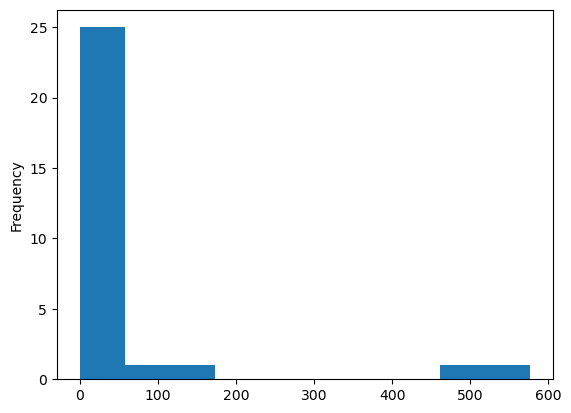

In [9]:
Event_Particles['Energy'].plot.hist()
plt.show()

## Lets have some fun now 
1. Try plotting the other columns in the dataframe 
2. how can we plot the correlation between columns - 
  dataframe.plot(kind='scatter',x='column_A',y='column_B',color='red')
  plt.show()
3. plotting bar charts 
  dataframe.plot(kind='bar',x='column_A',y='column_B')
  plt.show()
3. Lets rerun the simulation and remake the plots 
4. how to plot multiple axes on top of each other 
  ax = plt.gca() [gca stands for 'get current axis']
  dataframe.plot(kind='line',x='column_A',y='column_B',ax=ax)
  dataframe.plot(kind='line',x='column_A',y='column_C', color='red', ax=ax)
  plt.show()
5. Can we see how many particles are produced in each event? 
  dataframe.shape[0] or you can also check the shape of particles array 

